# Disciplina: Introdução a programação para geocientistas

# Aula 11 - Operações com vetores e matrizes - parte 2

## Matrizes

- Variável composta multidimensional
- É equivalente a um vetor, contudo permite a utilização de diversas dimensões acessadas via diferentes índices
- Pode ser pensada como um vetor onde cada célula é outro vetor
- Em diversas situações matrizes são necessárias para correlacionar informações

## Exemplo motivacional

Assumindo que em uma determinada área temos medidas diferentes. Por exemplo, temos medidas localização (latitude, longitute) e altitude. Seria necessário um vetor de 3 posições para guardar os dados dessa determinada localização.

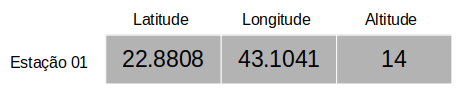

Contudo, assumindo que estamos avaliando dados de um perfil, seria necessária uma matriz bidimensional para guardar os dados de todas as estações...

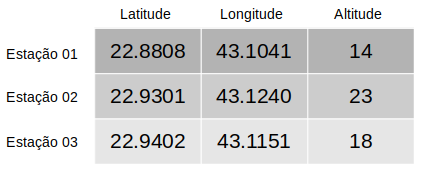

In [1]:
import numpy as np

In [2]:
coordenadas = np.array([[22.8808, 43.1041, 14],[22.9301, 43.1240, 23], [22.9402, 43.1151, 18]])
coordenadas

array([[22.8808, 43.1041, 14.    ],
       [22.9301, 43.124 , 23.    ],
       [22.9402, 43.1151, 18.    ]])

### Acessando os valores

In [3]:
# Primeira estação

coordenadas[0]

array([22.8808, 43.1041, 14.    ])

In [4]:
# Latitude da primeira estação

coordenadas[0][0] #outra forma de pedir a mesma coisa é digitar [0,0]

22.8808

In [5]:
# Altitude da terceira estação

coordenadas[2][2]

18.0

In [6]:
# Longitude da segunda estação

coordenadas[1][1]

43.124

In [7]:
coordenadas[0,0]

22.8808

### Calcular a altitude média

In [8]:
(14+23+18)/3

18.333333333333332

#### Usando o `for`

In [9]:
cont = soma = 0
linhas,colunas = coordenadas.shape

print(linhas,colunas)

3 3


In [10]:
for i in range(linhas):
    print(coordenadas[i][2])
    soma = soma + coordenadas[i][2]
    cont = cont + 1

media1 = soma/cont

media1

14.0
23.0
18.0


18.333333333333332

#### Usando os índices

In [11]:
altitudes = coordenadas[:,2]
altitudes

array([14., 23., 18.])

In [12]:
media2 = np.sum(altitudes)/len(altitudes)

media2

18.333333333333332

#### Usando uma função do Python

In [13]:
media3 = np.mean(altitudes)

media3

18.333333333333332

In [14]:
np.median(altitudes)

18.0

### Preencher uma matriz por leitura

In [15]:
# Criar matriz de zeros

coordenadas = np.zeros((3,3))
linhas,colunas = coordenadas.shape

coordenadas

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
# Preencher cada linha

linhas = int(input('Quantas estações '))
coordenadas = np.zeros((linhas,3))

for i in range(linhas):
    
    # Preencher cada coluna
    
    for j in range(colunas):
        msg = float(input(f'Entre com a Latitude/Longitude/Altitude da estação {i+1}? '))
        coordenadas[i][j] = msg

Quantas estações 2
Entre com a Latitude/Longitude/Altitude da estação 1? 21.4
Entre com a Latitude/Longitude/Altitude da estação 1? 43.2
Entre com a Latitude/Longitude/Altitude da estação 1? 14
Entre com a Latitude/Longitude/Altitude da estação 2? 22.7
Entre com a Latitude/Longitude/Altitude da estação 2? 44.2
Entre com a Latitude/Longitude/Altitude da estação 2? 18


#### coordenadas

In [17]:
#imprimir em formato de matriz - por linhas

for i in range(linhas):
    print(coordenadas[i])

[21.4 43.2 14. ]
[22.7 44.2 18. ]


In [18]:
#imprimir um por um

for i in range(linhas):
    for j in range(colunas):
        print(coordenadas[i][j])

21.4
43.2
14.0
22.7
44.2
18.0


In [27]:
# Criar matriz de zeros

linhas = int(input('Quantas estações '))
coordenadas = np.zeros((linhas,3))

# Preencher cada linha

for i in range(linhas):
    lat,lon,alt = [float(j) for j in input(f'Entre com a Lat, Lon, Alt da estação {i+1} separados por vírgula ').split(',')]  
    coordenadas[i] = lat,lon,alt
    

Quantas estações 1
Entre com a Lat, Lon, Alt da estação 1 separados por vírgula 22.3, 44.8, 14


In [28]:
#imprimir em formato de matriz - por linhas

for i in range(linhas):
    print(coordenadas[i])

[22.3 44.8 14. ]


In [29]:
coordenadas

array([[22.3, 44.8, 14. ]])

## Contando elementos dentro das matrizes

In [30]:
# Criar uma matriz 3x4, automaticamente, usando o arange()

sequencia = np.arange(12)
sequencia

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [31]:
matriz = sequencia.reshape((3,4))
matriz

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
# Contar os números pares

count = 0
linhas, colunas = matriz.shape
print(linhas, colunas)

3 4


In [33]:
# Linhas
for i in range(linhas):
    for j in range(colunas):
        if matriz[i][j] % 2 == 0:
            count += 1
count

6

In [34]:
# A partir de uma matriz de números aleatorios

sequencia = np.random.randint(0,100,12)
sequencia

array([79, 74, 40, 64,  8, 72, 47,  5, 29, 22, 78, 35])

In [35]:
matriz = sequencia.reshape(3,4)
matriz

array([[79, 74, 40, 64],
       [ 8, 72, 47,  5],
       [29, 22, 78, 35]])

In [36]:
# Linhas
for i in range(linhas):
    for j in range(colunas):
        if matriz[i][j] % 2 == 0:
            count += 1
            print(matriz[i][j])


74
40
64
8
72
22
78


In [37]:
count

13

## Matrizes de N dimensões

Uma matriz pode ter um número qualquer de dimensões! Basta usar um índice para cada dimensão.

Voltando ao exemplo das estações, vamos assumir que uma área tenha dois perfis. Seria necessário uma matriz tridimensional para guardar os dados de todos os perfis.

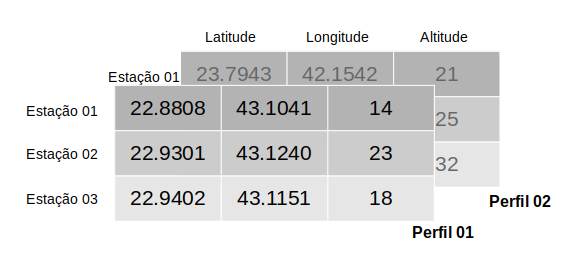

In [38]:
coordenadas = np.array([[[22.8808, 43.1041, 14], [22.9301, 43.1240, 23], [22.9402, 43.1151, 18]],
                       [[23.7943, 42.1542, 21], [23.5321, 42.7639, 25], [24.9762, 44.1891, 32]]])

In [39]:
coordenadas

array([[[22.8808, 43.1041, 14.    ],
        [22.9301, 43.124 , 23.    ],
        [22.9402, 43.1151, 18.    ]],

       [[23.7943, 42.1542, 21.    ],
        [23.5321, 42.7639, 25.    ],
        [24.9762, 44.1891, 32.    ]]])

In [40]:
coordenadas.shape

(2, 3, 3)

### Atribuição

In [42]:
# Perfil 1
coordenadas[1]

array([[23.7943, 42.1542, 21.    ],
       [23.5321, 42.7639, 25.    ],
       [24.9762, 44.1891, 32.    ]])

In [44]:
# Estação 2 do perfil 2

coordenadas[1][1]

array([23.5321, 42.7639, 25.    ])

In [45]:
# Estação 3 do perfil 2

coordenadas[1][2]

array([24.9762, 44.1891, 32.    ])

In [46]:
# Todas as latitudes do primeiro perfil

coordenadas[0,:,0]

array([22.8808, 22.9301, 22.9402])

In [50]:
# Todas as longitudes

coordenadas[:,:,1]

array([[43.1041, 43.124 , 43.1151],
       [42.1542, 42.7639, 44.1891]])

### Operações úteis

#### `max(), min(), sum(), mean()`

In [51]:
coordenadas

array([[[22.8808, 43.1041, 14.    ],
        [22.9301, 43.124 , 23.    ],
        [22.9402, 43.1151, 18.    ]],

       [[23.7943, 42.1542, 21.    ],
        [23.5321, 42.7639, 25.    ],
        [24.9762, 44.1891, 32.    ]]])

In [52]:
coordenadas[0,:,0].max()

22.9402

In [53]:
coordenadas[0,:,0].min()

22.8808

In [54]:
coordenadas[:,:,2].sum()

133.0

In [55]:
coordenadas[:,:,2].mean()

22.166666666666668

### Operações e plotagem com vetores e matrizes

Vimos que ao utilizar os arrays do numpy, podemos realizar operações em um conjunto de valores organizados em um array sem a necessidade de utilizar um `for`. As operações matemáticas são realizadas elemento a elemento. Podemos usar os arrays também para calcular fórmulas e plotar gráficos.

A biblioteca mais usual para plotagem é a `matplotlib.pyplot`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

In [56]:
import matplotlib.pyplot as plt

In [79]:
x = np.arange(0, 15, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

print(len(x))

150


In [80]:
#print(y)

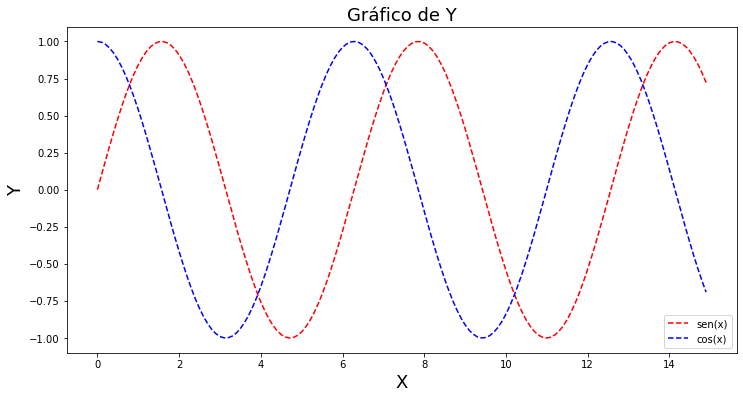

In [159]:
plt.figure(figsize=(12,6))
plt.plot(x, y1,'r--', label='sen(x)')
plt.plot(x, y2,'b--', label='cos(x)')
plt.xlabel('X', fontsize='18')
plt.ylabel('Y', fontsize='18')
plt.title('Gráfico de Y',fontsize='18')
plt.legend(loc='lower right')

plt.show()

## Exemplos

### 1.
A matriz `dados` abaixo é uma matriz 15x3. A primeira coluna representa o ID das estações, a segunda coluna, a localização em $x$ que contem as posições das medidas (como um perfil geofísico); e a terceira coluna representa a anomalia que contém os valores da anomalia. Plote o gráfico da anomalia.

In [104]:
estacoes = np.arange(1,16)
posicao = np.linspace(-35,35,15)
anomalia = np.array([0.4, 0.5, 1., 0.6, 1.2, 3.1, 5.5,6.3, 5.2, 4.1, 2.4, 1.3, 0.5, 0.3, 0.7])

In [105]:
dados = np.array([estacoes,posicao,anomalia]).T
print(dados)

[[  1.  -35.    0.4]
 [  2.  -30.    0.5]
 [  3.  -25.    1. ]
 [  4.  -20.    0.6]
 [  5.  -15.    1.2]
 [  6.  -10.    3.1]
 [  7.   -5.    5.5]
 [  8.    0.    6.3]
 [  9.    5.    5.2]
 [ 10.   10.    4.1]
 [ 11.   15.    2.4]
 [ 12.   20.    1.3]
 [ 13.   25.    0.5]
 [ 14.   30.    0.3]
 [ 15.   35.    0.7]]


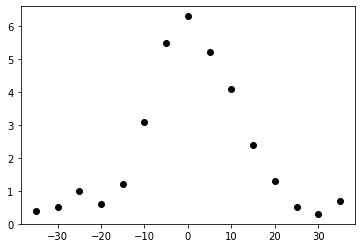

In [100]:
plt.plot(posicao,anomalia,'ko')

In [117]:
dados[:,1]

array([-35., -30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,
        20.,  25.,  30.,  35.])

Text(0, 0.5, 'Anomalia')

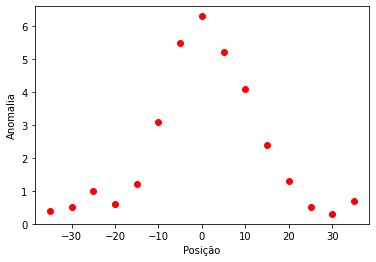

In [120]:
plt.plot(dados[:,1],dados[:,2],'ro')
plt.xlabel('Posição')
plt.ylabel('Anomalia')

### 2. 
Escreva um programa para converter temperaturas de celsius para fahrenheit usando a fórmula abaixo:

$$ F = (9\times C + (32 *5))/5 $$

Em que $C$ é a temperatura em graus Celcius e $F$ é a temperatura em graus Fahrenheit. Plote o resultado em Celcius e Fahrenheit. Plote também a temperatura média.

In [121]:
temperaturas_julho = np.array([18.6, 19.5, 20.7, 20.6, 19.5, 19.9, 19.4, 20.2, 20.6, 21.3, 
                               21, 21.1, 21.1, 22.6, 25.8, 23.7, 21.1, 21.3, 19.6, 18.8, 18.8, 
                               19.9, 20.7, 20.8, 21.6, 22.8, 27.1, 19.7])

dias = np.arange(1,len(temperaturas_julho)+1)

In [122]:
dias

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [123]:
C = temperaturas_julho
F = (9*C+(32*5))/5

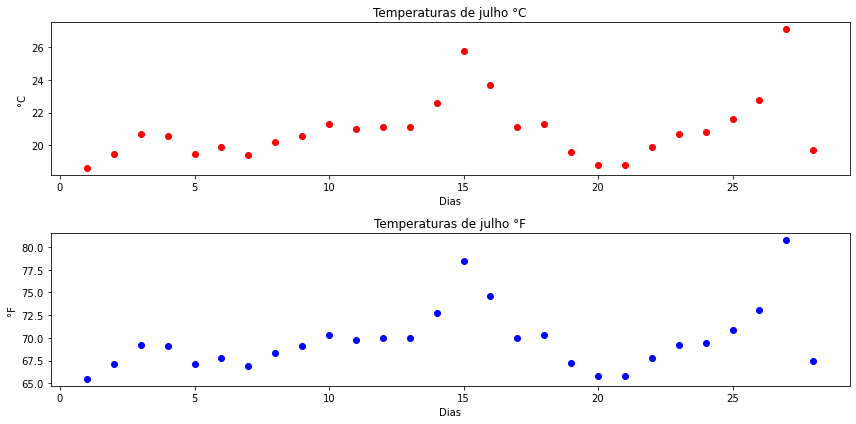

In [138]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(dias,C,'ro')
plt.xlabel('Dias')
plt.ylabel('°C')
plt.title('Temperaturas de julho °C')

plt.subplot(2,1,2)
plt.plot(dias,F,'bo')
plt.xlabel('Dias')
plt.ylabel('°F')
plt.title('Temperaturas de julho °F')

plt.savefig('temperatura.jpeg')
plt.tight_layout()
plt.show()

### 3.
Seja a função abaixo abaixo:

$$
y(x) = \frac{1}{\sqrt{2\pi}}\exp(-0.5x^2)
$$

* Preencher o array `x` com valores para coordenadas x uniformemente espaçadas em [-4, 4]. 
* Preencher o array `y` com valores y(x), respectivamente, onde y(x) é definido pela fórmula acima. 
* Plotar o gráfico de `y`.

### 4.
Dado um vetor $v = (2, 3, -1)$ e uma função $f(x) = x^3 + xe^x + 1$, aplicar $f$ a cada elemento em $v$. Depois calcular $f(v)$ como $v^3 + ve^v + 1$, utilizando regras de computação vetorial. Mostrar que os dois resultados são iguais. Plote o gráfico de $f(v)$.

### 5. 
Faça um programa que leia duas matrizes A e B 2x2 e imprima a matriz C que é a soma das matrizes A e B.

### 6. 
Faça um programa que leia uma matriz 3x3 de inteiros e retorne a linha de maior soma. Imprima na tela a matriz, a
linha de maior soma e a soma.

### 7. 

Faça um programa que leia uma matriz 6x3 com números reais, calcule e mostre: 
* (a) o maior elemento da matriz e sua respectiva posição (linha e coluna); 
* (b) o menor elemento da matriz e sua respectiva posição. 

### 8.

Faça um programa que leia as dimensões de duas matrizes A e B, e depois leia as duas matrizes. Se as matrizes forem de tamanhos compatíveis para multiplicação, multiplique as matrizes. Imprima as matrizes A, B e a matriz resultante da multiplicação. Depois compare com a função `dot()`

### 9.

Faça um programa que leia duas matrizes A e B e verifica se B é a inversa de A (ou seja, se a multiplicação de A por B é a matriz identidade). 

Exemplo de matriz identidade 3x3

$$\begin{split}
\mathbf{I} 
    & = \left[
    \begin{array}{cccc}
        1  &
        0  &
        0  \\
        0  &
        1  &
        0  \\
        0  &
        0  &
        1  \\
    \end{array}
    \right] \: .    
\end{split}
$$
